In [ ]:
# Perceptron multicapa (MLP) con una capa oculta

# Define las funciones de activación
# Implementa el algoritmo de aprendizaje (BP)
# Calcula la salida para unos datos de test [0,2pi]
# Representa la salida estimada y la deseada

# Modifica la constante de adaptación
# Modifica el número de neuronas en la capa oculta
# Emplea la función de activación sigmoide en lugar de tanh 
# Predice valores fuera del rango de entrenamiento [0,4pi] (PERO MANTENIENDO EL ENTRENAMIENTO DE [0, 2PI], PARA VER COMO PREDICE.)

import numpy as np

#Definimos las funciones de activación y sus derivadas
def sigmoid_fn(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_dfn(x):
    s = sigmoid_fn( x )
    return s * (1 - s)

def tanh_fn(x):
    return np.tanh(x)

def tanh_dfn(x):
    s = tanh_fn( x )
    return 1 - s ** 2

# Elegimos función activación
activation_fn  = tanh_fn
activation_dfn = tanh_dfn

epoch = 0
reportFreq = 200000

learning_rate = 0.05

sample_size = 1  #capa 0 entrada
hidden_size = 10  #capa 1 oculta
output_size = 1   #capa 2 salida    # definir matrices que vamos a utilizar en base a estas variables de aquí; LOS TAMAÑOS DE LAS MATRICES

error       = np.zeros( ( output_size, sample_size ) )

# Inicializamos pesos y bias de las dos capas (neuronas en filas, entradas en columnas):
layer1_weights = np.random.rand(hidden_size, sample_size)
layer1_bias = np.random.rand(hidden_size, 1) # cada neurona de la capa con un bias

layer2_weights = np.random.rand(output_size, hidden_size)
layer2_bias = np.random.rand(output_size, 1)

# Épocas de entrenamiento (Algoritmo Backpropagation):
while epoch <= 1e6:
    
    # Generación del conjunto de entrenamiento online (sinusoide)
    # Elegimos una muestra de entrada (uniforme [0-2pi]):
    sample_vec = np.random.uniform(0.0, np.pi * 2.0, (sample_size, 1))
    # Calculamos la salida (seno(x)):
    output_vec = np.sin(sample_vec)

    # Propagamos hacia adelante (entrada a oculta):
    layer1_sums = np.dot(layer1_weights, sample_vec) + layer1_bias
    layer1_outputs = activation_fn(layer1_sums)

    # Propagamos hacia adelante (oculta a salida):
    layer2_sums = np.dot(layer2_weights, layer1_outputs) + layer2_bias
    layer2_outputs = activation_fn(layer2_sums)


    # Retropropagamos errores (salida a oculta):
    layer2_deltas = - (output_vec - layer2_outputs) * activation_dfn(layer2_sums) # hacemos el (deseado - obtenido) y luego lo multiplicamos por la derivada

    # Retropropagamos errores (oculta a entrada):
    layer1_deltas = np.dot(layer2_weights.T, layer2_deltas) * activation_dfn(layer1_sums) # así sale dimensión (hidden, 1)

    # Actualizamos pesos aplicando las deltas (capa 0):
    layer1_weights -= learning_rate * np.dot(layer1_deltas, sample_vec.T) # así sale dimensión (hidden, sample)
    layer1_bias -= learning_rate * layer1_deltas
    
    # Actualizamos pesos aplicando las deltas (capa 1):
    layer2_weights -= learning_rate * np.dot(layer2_deltas, layer1_outputs.T)
    layer2_bias -= learning_rate * layer2_deltas

    # Calculamos error para mostrar:
    error += np.absolute(output_vec - layer2_outputs)
    
    # Mostramos el error:
    if epoch % reportFreq == 0:
        print("Epoch: %d\nError: %f" % (epoch, np.sum(error) / float(sample_size) / float(reportFreq))) # error promedio en el intervalo hasta ciertas iteraciones
        error = np.zeros((sample_size, 1)) # contador en 0 de nuevo para el error...

    # Incrementamos la epoca (iteramos)
    epoch += 1




In [94]:
import numpy as np

def train_MLP(sample_size=1, hidden_size=10, output_size=1, learning_rate=0.05, activation_fn=np.tanh, activation_dfn=None, epochs=1000000, report_freq=200000):
    # Definición de funciones de activación y sus derivadas
    if activation_fn == np.tanh:
        activation_dfn = lambda x: 1 - np.tanh(x) ** 2
    elif activation_fn == sigmoid_fn:
        activation_dfn = lambda x: sigmoid_fn(x) * (1 - sigmoid_fn(x))

    # Inicialización de pesos y sesgos
    layer1_weights = np.random.rand(hidden_size, sample_size)
    layer1_bias = np.random.rand(hidden_size, 1)
    layer2_weights = np.random.rand(output_size, hidden_size)
    layer2_bias = np.random.rand(output_size, 1)

    epoch = 0
    error = np.zeros((output_size, sample_size))

    # Entrenamiento del modelo
    while epoch <= epochs:
        sample_vec = np.random.uniform(0.0, np.pi * 2.0, (sample_size, 1))
        output_vec = np.sin(sample_vec)

        layer1_sums = np.dot(layer1_weights, sample_vec) + layer1_bias
        layer1_outputs = activation_fn(layer1_sums)

        layer2_sums = np.dot(layer2_weights, layer1_outputs) + layer2_bias
        layer2_outputs = activation_fn(layer2_sums)

        layer2_deltas = -(output_vec - layer2_outputs) * activation_dfn(layer2_sums)
        layer1_deltas = np.dot(layer2_weights.T, layer2_deltas) * activation_dfn(layer1_sums)

        layer1_weights -= learning_rate * np.dot(layer1_deltas, sample_vec.T)
        layer1_bias -= learning_rate * layer1_deltas
        layer2_weights -= learning_rate * np.dot(layer2_deltas, layer1_outputs.T)
        layer2_bias -= learning_rate * layer2_deltas

        error += np.absolute(output_vec - layer2_outputs)

        if epoch % report_freq == 0:
            print("Epoch: %d\nError: %f" % (epoch, np.sum(error) / float(sample_size) / float(report_freq)))
            error = np.zeros((output_size, sample_size))

        epoch += 1

    return layer1_weights, layer1_bias, layer2_weights, layer2_bias

# Ejemplo de uso:
trained_weights = train_MLP(sample_size=1, hidden_size=10, output_size=1, learning_rate=0.05, activation_fn=np.tanh, epochs=1e6, report_freq=2e5)


Epoch: 0
Error: 0.000006
Epoch: 200000
Error: 0.076846
Epoch: 400000
Error: 0.020035
Epoch: 600000
Error: 0.017777
Epoch: 800000
Error: 0.017259
Epoch: 1000000
Error: 0.016930


In [91]:
# Test: aplico la red a nuevos datos
x = np.linspace(0.0, np.pi * 2.0, 20)
d = np.sin( x )

y = np.zeros( ( x.size, 1 ) )
for i, sample_vec in enumerate(x):
    
    # Propagamos hacia adelante (entrada a oculta):
    layer1_sums = np.dot(layer1_weights, sample_vec) + layer1_bias
    layer1_outputs = activation_fn(layer1_sums)

    # Propagamos hacia adelante (oculta a salida):
    layer2_sums = np.dot(layer2_weights, layer1_outputs) + layer2_bias
    layer2_outputs = activation_fn(layer2_sums)

    # Almaceno la salida
    y[i] = layer2_outputs

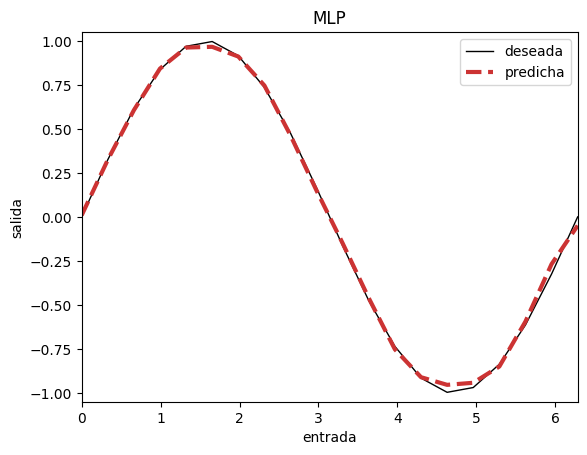

In [92]:
# Representación de la salida estimada
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, d, 'k-', label='deseada', lw=1)
plt.plot(x, y, '--', color=(0.8, 0.2, 0.2), label='predicha', lw=3)

plt.xlim([0.0, x.max(0)])
plt.ylim([-1.05, 1.05])
plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('MLP')
plt.legend(loc="upper right")